Train MSE: 8.49
Test MSE: 3.81
Train R2 Score: 0.78
Prediction for Sample 1: Memory Needed: 41.55 Cores Needed: 1
Prediction for Sample 2: Memory Needed: 35.34 Cores Needed: 2
Prediction for Sample 3: Memory Needed: 47.34 Cores Needed: 4
Prediction for Sample 4: Memory Needed: 47.71 Cores Needed: 2
Prediction for Sample 5: Memory Needed: 30.38 Cores Needed: 1


C:\Users\laksh\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\laksh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


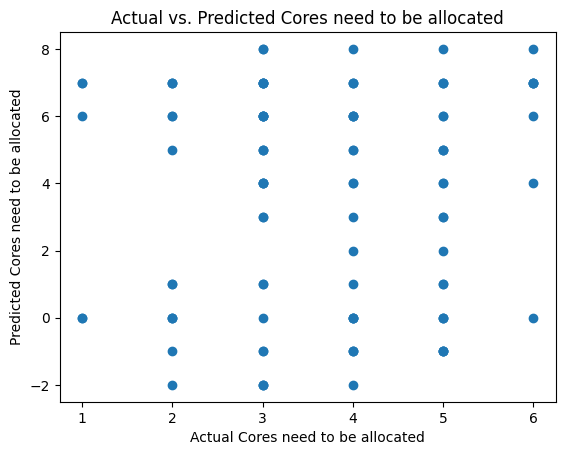

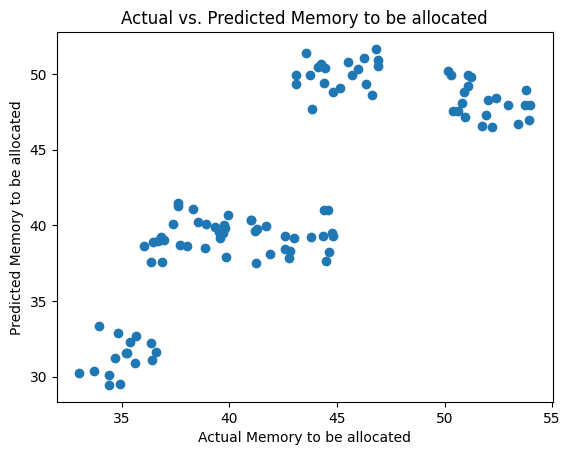

In [14]:
## Dataset-1 CPU intensive task.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define original dataset
data = {
    'C1': [90.9, 84.6, 91.2, 85.3, 88.8],
    'C2': [85.6, 91.6, 95.1, 93.5, 81.3],
    'C3': [68.5, 2.2, 98.5, 86.5, 0],
    'C4': [88.2, 79.4, 84.4, 95.6, 92.2],
    'Memory Used': [40.2945, 36.7568, 49.9707, 42.9435, 32.4115],
    'Cores Allocated': [1, 2, 4, 2, 1]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Split data into features (X) and target (y)
X = df.drop('Memory Used', axis=1)
y = df['Memory Used']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print("Train MSE: {:.2f}".format(mse_train))
print("Test MSE: {:.2f}".format(mse_test))
print("Train R2 Score: {:.2f}".format(r2_train))
#print("Test R2 Score: {:.2f}".format(r2_test))

# Update predictions for memory and cores needed to be allocated
new_data = {
    'C1': [91.7, 85.3, 92.2, 86.3, 89.9],
    'C2': [86.4, 92.4, 95.9, 94.3, 82.1],
    'C3': [69.5, 3.2, 99.5, 87.5, 0],
    'C4': [89.2, 80.4, 85.4, 96.6, 93.2],
    'Cores Allocated': [1, 2, 4, 2, 1]
}

# Convert new data to DataFrame
df_new = pd.DataFrame(new_data)

# Make predictions for memory and cores needed to be allocated
y_pred_new = model.predict(df_new)

# Print predicted memory and cores
for i in range(len(df_new)):
    print("Prediction for Sample {}: Memory Needed: {:.2f} Cores Needed: {}".format(i+1, y_pred_new[i], df_new['Cores Allocated'][i]))
    
    
import matplotlib.pyplot as plt

# Scatter plot for Cores need to be allocated
plt.scatter(y_cores_test, y_cores_pred_rounded)
plt.xlabel("Actual Cores need to be allocated")
plt.ylabel("Predicted Cores need to be allocated")
plt.title("Actual vs. Predicted Cores need to be allocated")
plt.show()

# Scatter plot for Memory to be allocated
plt.scatter(y_memory_test, y_memory_pred)
plt.xlabel("Actual Memory to be allocated")
plt.ylabel("Predicted Memory to be allocated")
plt.title("Actual vs. Predicted Memory to be allocated")
plt.show()

Train MSE: 76.53
Test MSE: 70.69
Train R2 Score: 0.98
Test R2 Score: 0.98


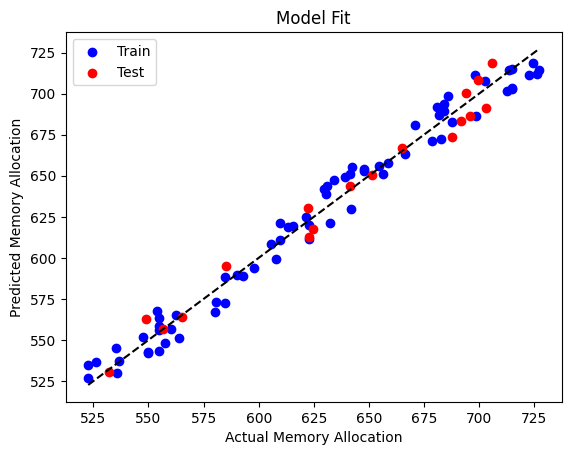

Prediction for Test Sample: Memory Allocation: 577.00


C:\Users\laksh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
## Dataset-2 Memory Intensive Task

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import random

#Define original dataset
# data = {
#     'Memory Used': [539.4351, 534.388, 538.9559, 543.4699, 538.4246,628.807633, 614.385280, 675.788321,629.838335, 625.987154, 663.312485, 616.353207, 627.717910],
#     'Memory Allocation': [565, 555, 555, 554, 549, 641.774693, 623.024489, 681.563309,648.911577, 658.376763, 671.604226, 624.210978, 645.337524]
# }

# data = {
#     'Memory Used': [504.525583, 582.009567,  
#     'Memory Allocation': [517.179882, 591.712305,  
# }
memory_used = [539.4351, 534.388, 538.9559, 543.4699, 538.4246]
memory_allocation = [565, 555, 555, 554, 549]
variance = 18  # Variance for memory_used and memory_allocation
num_data_points = 100  # Number of additional data points to generate

# Generate additional data points
for i in range(num_data_points):
    memory_used.append(random.uniform(500, 700))
    memory_allocation.append(random.uniform(max(memory_used[-1] + 20 - variance, 500), memory_used[-1] + 20 + variance))

# Convert data to DataFrame
data = {
    'Memory Used': memory_used,
    'Memory Allocation': memory_allocation
}
#df = pd.DataFrame(data)



# Convert data to DataFrame
df = pd.DataFrame(data)

# Add a column for Memory Difference (Allocation - Used)
df['Memory Difference'] = df['Memory Allocation'] - df['Memory Used']

# Filter samples where Memory Difference is less than 10
df = df[df['Memory Difference'] >= 10]

# Split data into features (X) and target (y)
X = df.drop(['Memory Allocation', 'Memory Difference'], axis=1)
y = df['Memory Allocation']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LinearRegression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print("Train MSE: {:.2f}".format(mse_train))
print("Test MSE: {:.2f}".format(mse_test))
print("Train R2 Score: {:.2f}".format(r2_train))
print("Test R2 Score: {:.2f}".format(r2_test))

# # Generate classification report for test data
# y_pred_test = np.round(y_pred_test)  # Round predictions to nearest integer
# y_test = np.array(y_test)  # Convert y_test to numpy array for comparison
# y_pred_test = y_pred_test.astype(int)  # Convert y_pred_test to integer for comparison



# print("Classification Report:")
# print(classification_report(y_test, y_pred_test))

# Plot model fit
plt.scatter(y_train, y_pred_train, color='blue', label='Train')
plt.scatter(y_test, y_pred_test, color='red', label='Test')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linestyle='--')
plt.xlabel('Actual Memory Allocation')
plt.ylabel('Predicted Memory Allocation')
plt.title('Model Fit')
plt.legend()
plt.show()

# Predict memory allocation for a test sample
test_sample = np.array([[543.4699]])
test_prediction = model.predict(test_sample)
test_prediction = int(test_prediction + 10)  # Add 10 to the predicted memory allocation
print("Prediction for Test Sample: Memory Allocation: {:.2f}".format(test_prediction))


Epoch 1/100
1/1 [==============================] - 1s 973ms/step - loss: 74.2955 - accuracy: 0.0000e+00 - val_loss: 115.4549 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 67ms/step - loss: 29.1495 - accuracy: 0.0000e+00 - val_loss: 76.8741 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 68ms/step - loss: 7.7426 - accuracy: 0.0000e+00 - val_loss: 49.9878 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 63ms/step - loss: 6.6548 - accuracy: 0.0000e+00 - val_loss: 35.1618 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 62ms/step - loss: 13.8587 - accuracy: 0.0000e+00 - val_loss: 29.0934 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 62ms/step - loss: 18.2646 - accuracy: 0.0000e+00 - val_loss: 28.4323 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 62ms/step - loss: 17.1530 - accuracy: 0.0000e+

1/1 [==============================] - 0s 60ms/step - loss: 0.0065 - accuracy: 0.0000e+00 - val_loss: 44.9616 - val_accuracy: 0.0000e+00
Epoch 56/100
1/1 [==============================] - 0s 65ms/step - loss: 0.0046 - accuracy: 0.0000e+00 - val_loss: 44.1061 - val_accuracy: 0.0000e+00
Epoch 57/100
1/1 [==============================] - 0s 71ms/step - loss: 0.0276 - accuracy: 0.0000e+00 - val_loss: 43.5048 - val_accuracy: 0.0000e+00
Epoch 58/100
1/1 [==============================] - 0s 73ms/step - loss: 0.0561 - accuracy: 0.0000e+00 - val_loss: 43.2112 - val_accuracy: 0.0000e+00
Epoch 59/100
1/1 [==============================] - 0s 67ms/step - loss: 0.0720 - accuracy: 0.0000e+00 - val_loss: 43.2305 - val_accuracy: 0.0000e+00
Epoch 60/100
1/1 [==============================] - 0s 94ms/step - loss: 0.0672 - accuracy: 0.0000e+00 - val_loss: 43.5236 - val_accuracy: 0.0000e+00
Epoch 61/100
1/1 [==============================] - 0s 90ms/step - loss: 0.0470 - accuracy: 0.0000e+00 - val_loss

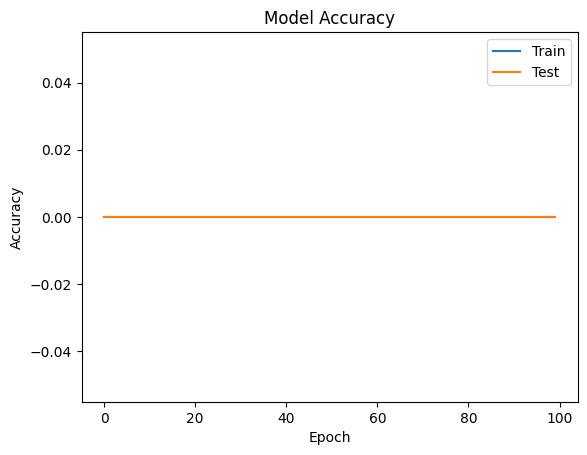

1/1 [==============================] - 0s 29ms/step
Classification Report for Cores Required:
Train Set:
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00         3
         3.0       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Test Set:
              precision    recall  f1-score   support

        -5.0       0.00      0.00      0.00       0.0
         2.0       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Classification Report for Memory Allocation:
Train Set:
              precision    recall  f1-score   support

        15.0       0.00      0.00      0.00       0.0
        31.0       0.00      0.00      0.00       0.0
        32.0

C:\Users\laksh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laksh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laksh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\

ValueError: in user code:

    File "C:\Users\laksh\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\laksh\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\laksh\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\laksh\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\laksh\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\laksh\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 6), found shape=(None, 8)


In [57]:
# Dataset - III Web Servers

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = np.array([
    [34.5, 10.3, 0, 53.4, 48.2907, 15, 2, 56],
    [58.657183, 2.154542, 13.86494, 14.392597, 37.257309, 22, 2, 49],
    [54.697182, 95.759772, 20.976106, 77.758184, 97.258024, 80, 3, 110],
    [71.78987, 59.361732, 2.570869, 28.856184, 79.928586, 31, 2, 90],
    [24.384266, 18.17855, 36.697492, 79.982981, 44.153687, 32, 2, 55]
])

# Split the dataset into features and labels
X = data[:, :-2]
y_cores = data[:, -2]
y_memory = np.maximum(data[:, -1], data[:, -3])

# Apply data augmentation by adding random noise to features
X_augmented = X + np.random.normal(0, 0.1, size=X.shape)

# Split the augmented dataset into train and test sets
X_train, X_test, y_cores_train, y_cores_test, y_memory_train, y_memory_test = train_test_split(X_augmented, y_cores, y_memory, test_size=0.2, random_state=42)

# Define the ANN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_cores_train, validation_data=(X_test, y_cores_test), epochs=100, batch_size=8)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# Generate predictions for cores required and memory allocation
y_cores_pred_train = model.predict(X_train).flatten()
y_cores_pred_test = model.predict(X_test).flatten()
y_memory_pred_train = np.maximum(model.predict(X_train).flatten(), X_train[:, -1])
y_memory_pred_test = np.maximum(model.predict(X_test).flatten(), X_test[:, -1])

# Round the predicted values to the nearest integer for cores required
y_cores_pred_train = np.round(y_cores_pred_train).astype(int)
y_cores_pred_test = np.round(y_cores_pred_test).astype(int)

# Round the predicted values to the nearest integer for memory allocation
y_memory_pred_train = np.round(y_memory_pred_train).astype(int)
y_memory_pred_test = np.round(y_memory_pred_test).astype(int)

# Calculate accuracy scores
train_accuracy_cores = accuracy_score(y_cores_train, y_cores_pred_train)
test_accuracy_cores = accuracy_score(y_cores_test, y_cores_pred_test)

# Calculate accuracy scores for memory allocation
train_accuracy_memory = accuracy_score(y_memory_train, y_memory_pred_train)
test_accuracy_memory = accuracy_score(y_memory_test, y_memory_pred_test)

# Display classification report for cores required
print("Classification Report for Cores Required:")
print("Train Set:")
print(classification_report(y_cores_train, y_cores_pred_train))
print("Test Set:")
print(classification_report(y_cores_test, y_cores_pred_test))

# Display classification report for memory allocation
print("Classification Report for Memory Allocation:")
print("Train Set:")
print(classification_report(y_memory_train, y_memory_pred_train))
print("Test Set:")
print(classification_report(y_memory_test, y_memory_pred_test))

# Make predictions for cores required and memory allocation using the trained model
X_pred = np.array([[50, 30, 10, 20, 60, 25, 3, 65]]) # Example input for prediction
y_cores_pred = np.round(model.predict(X_pred)).astype(int).flatten()
y_memory_pred = np.maximum(model.predict(X_pred).flatten(), X_pred[:, -1])
y_memory_pred = np.round(y_memory_pred).astype(int).flatten()

# Display predictions for cores required and memory allocation
print("Predictions for Cores Required:")
print(y_cores_pred)
print("Predictions for Memory Allocation:")
print(y_memory_pred)
